In [12]:
LOG_PATH = "log/example.log"

log = open(LOG_PATH, 'r')

window_sizes = []
progresses = []

line = log.readline().strip()
while line:
    splits = line.split('|')
    if splits[0] == "window_size":
        window_sizes.append(int(splits[1]))
    elif splits[0] == "progress":
        progresses.append(float(splits[1]))
    line = log.readline().strip()


print(window_sizes)
print(progresses)

[0, 1, 2, 5, 3, 9]
[10.0, 14.0, 30.0, 50.0, 100.0, 150.0]


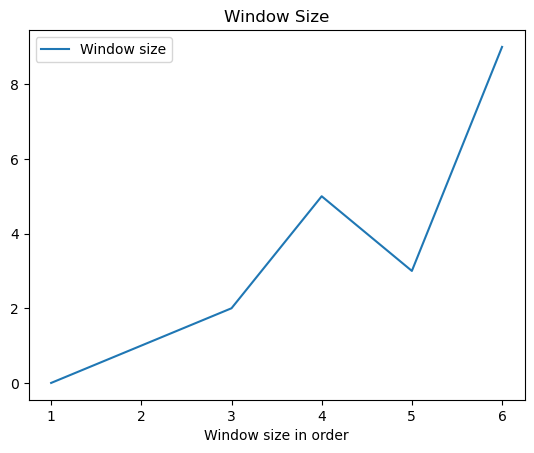

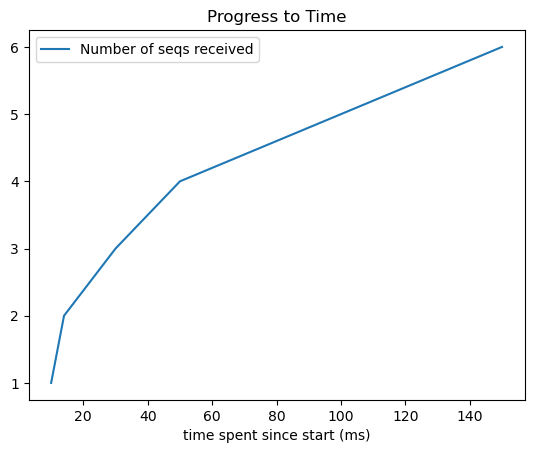

In [13]:
from matplotlib import pyplot as plt

window_x = range(1, len(window_sizes) + 1)
plt.figure()
plt.plot(window_x, window_sizes, label="Window size")
plt.xlabel("Window size in order")
plt.title("Window Size")
plt.legend()
plt.show()

progress_y = range(1, len(progresses) + 1)
plt.figure()
plt.plot(progresses, progress_y, label="Number of seqs received")
plt.xlabel("time spent since start (ms)")
plt.title("Progress to Time")
plt.legend()
plt.show()